<a href="https://colab.research.google.com/github/BryanFerreiraH/IA/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import h5py
import numpy as np
#Abrir datos
h5f = h5py.File('datos.h5', 'r')

#Cargamos los datos de entrenamiento 
x_train = h5f['x_train'][:]
#y_train = h5f['y_train'][:]

#Cargamos los datos de test
#x_test = h5f['x_test'][:]
#y_test = h5f['y_test'][:]

x_extra = h5f['x_extra'][:]
#y_extra = h5f['y_extra'][:]
h5f.close()

In [0]:
print(x_train.shape)
#print(y_test.shape)
x_train = np.concatenate((x_train,x_extra), axis=0)
x_train.shape

In [0]:
del x_extra
h5f = h5py.File('datos.h5', 'r')
y_train = h5f['y_train'][:]
x_test = h5f['x_test'][:]
y_test = h5f['y_test'][:]
y_extra = h5f['y_extra'][:]
h5f.close()

In [0]:
y_train = np.concatenate((y_train,y_extra), axis=0)
y_train.shape
del y_extra

In [0]:
#Agregar dimension de canal
x_train=np.expand_dims(x_train, axis=3).astype('float32')
x_test=np.expand_dims(x_test, axis=3).astype('float32')

In [7]:
from keras import models
from keras import layers
network = models.Sequential()

network.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(32,32,1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(20, (5, 5), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))

# Clasificador
network.add(layers.Flatten())
network.add(layers.Dense(100, activation='relu'))

# Neurona de salida
network.add(layers.Dense(10, activation='softmax'))

#Definimor el optmizador,la metricas para test/train y la funcion de perdida
network.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

history = network.fit(x_train, y_train, epochs=1, batch_size=128, validation_data=(x_test, y_test))

Using TensorFlow backend.


Train on 373257 samples, validate on 26032 samples
Epoch 1/1
373257/373257 [==============================] - 353s 947us/step - loss: 0.3650 - categorical_accuracy: 0.8964 - val_loss: 0.4098 - val_categorical_accuracy: 0.8877


In [8]:
# Comprobacacion de error
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test_acc:', test_acc)


26032/26032 [==============================] - 13s 499us/step
test_acc: 0.8877151198524893


In [0]:
from sklearn.metrics import confusion_matrix
Y_prediction = network.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

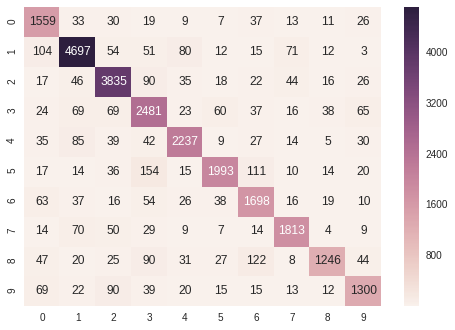

In [0]:
import seaborn as sns
plt.figure()
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [0]:
import matplotlib.pyplot as plt #Mostrar datos
#Error mostrando datos
#Visualizacion de datos
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylabel('Precision')
plt.xlabel('Numero de epoch')
plt.legend(['Train', 'Test'], loc= 0)

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Pérdida')
plt.xlabel('Numero de epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()

In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
